In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("shooting-1982-2023.csv")

In [3]:
len(df)

141

In [4]:
df.tail(3)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
138,San Ysidro McDonald's massacre,"San Ysidro, California",18-07-1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,Yes,Unknown,"One semiautomatic handgun, one rifle (assault)...",9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,32.5520013,-117.0430813,Mass,1984
139,Dallas nightclub shooting,"Dallas, Texas",29-06-1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,No,"Hines Boulevard Pawn Shop in Dallas, Texas",One semiautomatic handgun,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,32.925166,-96.838676,Mass,1984
140,Welding shop shooting,"Miami, Florida",20-08-1982,"Junior high school teacher Carl Robert Brown, ...",8,3,11,Other,51,Yes,...,Yes,"Garcia Gun Center in Hialeah, Fla.",One shotgun,Mossberg 500 Persuader pump-action shotgun wit...,white,Male,25.796491,-80.226683,Mass,1982


# Data cleaning

In [4]:
for i in df.columns:
    df[i].replace({"-":np.nan},inplace=True)

In [5]:
df.isnull().sum()

case                                 0
location                             0
date                                 0
summary                              0
fatalities                           0
injured                              0
total_victims                        0
location.1                           0
age_of_shooter                       2
prior_signs_mental_health_issues    28
mental_health_details               42
weapons_obtained_legally            17
where_obtained                      46
weapon_type                          0
weapon_details                      26
race                                13
gender                               0
latitude                            15
longitude                           15
type                                 0
year                                 0
dtype: int64

In [6]:
null_columns=df.columns[df.isna().sum()>0]
print(null_columns)

Index(['age_of_shooter', 'prior_signs_mental_health_issues',
       'mental_health_details', 'weapons_obtained_legally', 'where_obtained',
       'weapon_details', 'race', 'latitude', 'longitude'],
      dtype='object')


###### gender

In [7]:
df["gender"].value_counts()

Male                                         70
M                                            65
Male & Female                                 2
Female                                        2
F                                             1
F (identified as transgender, per police)     1
Name: gender, dtype: int64

In [8]:
df["gender"] = df["gender"].replace({"M": "Male"})
df["gender"] = df["gender"].replace({"Male & Female": "Male"})
df["gender"] = df["gender"].replace({"F (identified as transgender, per police)": "Male"})
df["gender"] = df["gender"].replace({"F": "Female"})


##### age of shooter

In [9]:
df["age_of_shooter"] = pd.to_numeric(df["age_of_shooter"], errors="coerce")


In [10]:
df.head(3)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28.0,NaN,...,NaN,NaN,"semiautomatic rifle, semiautomatic handgun",NaN,NaN,Male,NaN,NaN,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43.0,NaN,...,yes,NaN,semiautomatic handguns,NaN,Black,Male,NaN,NaN,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67.0,NaN,...,NaN,NaN,semiautomatic handgun,NaN,Asian,Male,NaN,NaN,Spree,2023


In [11]:
df["total_victims"] = pd.to_numeric(df["total_victims"], errors="coerce")


In [12]:
df["injured"] = pd.to_numeric(df["injured"], errors="coerce")


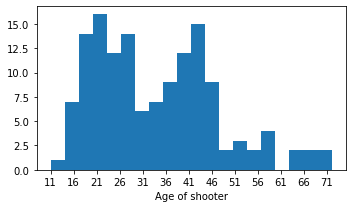

In [13]:
sorted_data=np.sort(df["age_of_shooter"])
fig, ax = plt.subplots(figsize=(5, 3))
n, bins, patches = ax.hist(sorted_data, bins=20)


interval = 5 
ax.set_xticks(np.arange(np.floor(min(bins)), np.ceil(max(bins)), interval))


ax.set_xlabel("Age of shooter")


plt.tight_layout()
plt.show()

In [14]:
df.describe()["age_of_shooter"]

count    139.000000
mean      34.014388
std       13.214499
min       11.000000
25%       22.500000
50%       32.000000
75%       43.000000
max       72.000000
Name: age_of_shooter, dtype: float64

In [15]:
df["age_of_shooter"]=df["age_of_shooter"].fillna(round(df["age_of_shooter"].mean()))

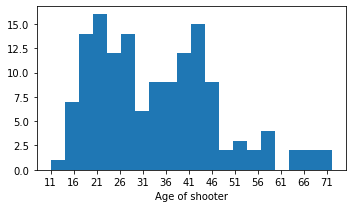

In [16]:
sorted_data=np.sort(df["age_of_shooter"])
fig, ax = plt.subplots(figsize=(5, 3))
n, bins, patches = ax.hist(sorted_data, bins=20)


interval = 5 
ax.set_xticks(np.arange(np.floor(min(bins)), np.ceil(max(bins)), interval))


ax.set_xlabel("Age of shooter")


plt.tight_layout()
plt.show()

#### prior_signs_mental_health_issues

In [17]:
df['prior_signs_mental_health_issues'] = df['prior_signs_mental_health_issues'].replace(['TBD', 'Unclear ', 'Unclear'], 'Unknown')
df['prior_signs_mental_health_issues'] = df['prior_signs_mental_health_issues'].replace(['yes', 'yes ', ' yes'], 'Yes')
df['prior_signs_mental_health_issues'] = df['prior_signs_mental_health_issues'].replace(['no', ' no', ' no '], 'No')
df["prior_signs_mental_health_issues"]=df["prior_signs_mental_health_issues"].fillna(df["prior_signs_mental_health_issues"].mode()[0])

In [18]:
df['prior_signs_mental_health_issues'].value_counts()

Yes        94
Unknown    30
No         17
Name: prior_signs_mental_health_issues, dtype: int64

In [19]:
df['prior_signs_mental_health_issues'].isnull().sum()

0

mental_health_details

In [20]:
null_columns

Index(['age_of_shooter', 'prior_signs_mental_health_issues',
       'mental_health_details', 'weapons_obtained_legally', 'where_obtained',
       'weapon_details', 'race', 'latitude', 'longitude'],
      dtype='object')

In [21]:
df['mental_health_details'] = df['mental_health_details'].replace(["Unclear"], 'Unknown')
df["mental_health_details"]=df["mental_health_details"].fillna(df["mental_health_details"].mode()[0])

 I tried to find keywords for mental health details 

In [22]:
keywords={"Paranoid":"Paranoid","Paranoia":"Paranoid","depression":"Depression","depressed":"Depression","behavior":"Behavioral Problems","violent":"Behavioral Problems","violance":"Behavioral Problems","suicidal":"Suicidal","fired":"Job Related","Boss":"Job Related","assignment":"Job Related","schizophrenia":"Schizophrenia","drug":"Drug,Alcohol","alcohol":"Drug,Alcohol","emotion":"Emotional","mental":"General Mental Problem","debt":"Debt","isolated":"Isolated"}

for keyword,replacement in keywords.items():
    df["mental_health_details"]=np.where(df["mental_health_details"].str.contains(keyword,case=False),replacement,df["mental_health_details"])
    
df["mental_health_details"]=df["mental_health_details"].fillna(np.nan)

In [23]:
df["mental_health_details"].value_counts()

Unknown                                                                                                                                                                                                                                                                          48
General Mental Problem                                                                                                                                                                                                                                                           23
Behavioral Problems                                                                                                                                                                                                                                                              14
Depression                                                                                                                                                                  

In [24]:
null_columns

Index(['age_of_shooter', 'prior_signs_mental_health_issues',
       'mental_health_details', 'weapons_obtained_legally', 'where_obtained',
       'weapon_details', 'race', 'latitude', 'longitude'],
      dtype='object')

In [5]:
df.drop([50], axis=0, inplace=True) # I dropped it because it has very high value for total_victims 


#### weapons obtained legally 

In [25]:
df["weapons_obtained_legally"]=df["weapons_obtained_legally"].astype(str)

In [26]:
df['weapons_obtained_legally'] = df['weapons_obtained_legally'].replace(['yes', 'yes ', ' yes',"\nYes","""Yes ("some of the weapons were purchased legally and some of them may not have been")""","Yes "], 'Yes')
df['weapons_obtained_legally'] = df['weapons_obtained_legally'].replace(['no', 'no ', ' no'], 'No')
df['weapons_obtained_legally'] = df['weapons_obtained_legally'].replace(['TBD', 'Unknown'], 'Unknown')
df['weapons_obtained_legally'] = df['weapons_obtained_legally'].replace(["Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI"], 'Unknown')






In [27]:
df["weapons_obtained_legally"].value_counts(normalize=True)

Yes        0.758065
No         0.129032
Unknown    0.112903
Name: weapons_obtained_legally, dtype: float64

In [28]:
import random

In [29]:
proportions=df["weapons_obtained_legally"].value_counts(normalize=True)
num_nan=df["weapons_obtained_legally"].isna().sum()
categories = proportions.index.tolist()
proportions = proportions.tolist()
fill_values = random.choices(categories, proportions, k=num_nan)
df.loc[df["weapons_obtained_legally"].isna(),"weapons_obtained_legally"]=fill_values


In [30]:
df["weapons_obtained_legally"].isna().sum()

0

In [31]:
df["weapons_obtained_legally"].value_counts()

Yes        106
No          19
Unknown     16
Name: weapons_obtained_legally, dtype: int64

#### weapon details

In [32]:
df["weapon_details"].isna().sum()

26

In [33]:
df["weapon_details"]=df["weapon_details"].fillna(df["weapon_details"].mode()[0])

In [34]:
df["weapon_details"].describe()

count                                   141
unique                                  110
top       .45-caliber semiautomatic handgun
freq                                     28
Name: weapon_details, dtype: object

##### race

In [35]:
df["race"].isna().sum()

13

In [36]:
df["race"]=df["race"].fillna(df["race"].mode()[0])

In [37]:
df["race"].value_counts()

white              54
White              31
Black              16
Latino             11
Asian              10
black               9
Other               5
Native American     3
unclear             1
White               1
Name: race, dtype: int64

In [38]:
df['race'] = df['race'].replace(['white', 'White '], 'White')
df['race'] = df['race'].replace(['black'], 'Black')
df['race'] = df['race'].replace(['unclear'], 'Unclear')

In [40]:
df["where_obtained"]=df["where_obtained"].fillna("Unknown")

In [41]:
df["where_obtained"].value_counts()
df['where_obtained'] = df['where_obtained'].replace(['Unclear', 'TBD'], 'Unknown')

###### location .1 

In [42]:
df["location.1"].value_counts()

Other          50
Workplace      45
School         22
Religious       7
Military        6
workplace       5
Other\n         3
Airport         1
religious       1
\nWorkplace     1
Name: location.1, dtype: int64

In [43]:
df['location.1'] = df["location.1"].replace(['workplace', '\nWorkplace'], 'Workplace')
df['location.1'] = df["location.1"].replace(['Other\n'], 'Other')
df['location.1'] = df["location.1"].replace(['religious'], 'Religious')



# Data anaysis and visualization

### Age and total_victims distribution

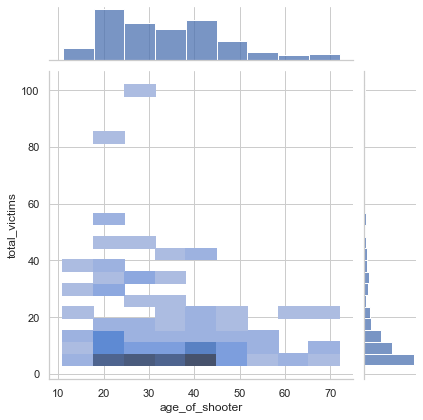

In [71]:
sns.jointplot(data=df,x="age_of_shooter",y="total_victims",kind="hist")

As can be seen, the most cases shooter’s age changes between 20 - 40 the mean age is 33.8 while the median is 32.5. The number of cases increases when the number of total victims decreases. Thus, in most cases, the total number of victims is less than 20, and the age of the shooter is between 20-40

In [45]:
np.median(df["age_of_shooter"])
np.mean(df["age_of_shooter"])

34.01418439716312

###  Is different locations have different age distributed shooters?


<AxesSubplot:xlabel='age_of_shooter', ylabel='location.1'>

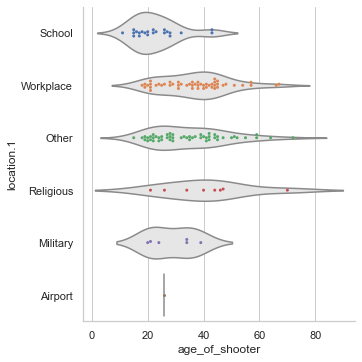

In [153]:
sns.catplot(data=df, x="age_of_shooter", y="location.1", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="age_of_shooter", y="location.1", size=3)


As can be seen, the school location has the lowest median which can be guessed easily. We can say that the oldest shooter in school is about 30 years old which is a small age compared to other locations. The unusual thing is the smallest age is 11 which can be thought of as a mistake at first. However, we know that the case occurred at school and the weapon was stolen, so it seems possible. To sum up, school location has the lowest age variability, and half of them ages over 21 and half of them below 21.

We can say religious places have the highest median which is 42. As it can be concluded, mostly older people committed crimes in religious places.

The ages of shooters who commit crimes in workplaces have roughly higher variability than the other 2 places. In addition, half of their age is less than 38, and half of them bigger than 38. Moreover, workplaces have extreme values like a minimum of 18 and a maximum of 67 which is somewhat possible..

In [148]:
np.median(religious_age)
np.median(workplace_age)


38.0

In [145]:
min(df[df["location.1"]=="Workplace"]["age_of_shooter"])

18.0

In [146]:
max(df[df["location.1"]=="Workplace"]["age_of_shooter"])

67.0

In [147]:
school_age=pd.DataFrame(df[df["location.1"]=="School"]["age_of_shooter"])
workplace_age=pd.DataFrame(df[df["location.1"]=="Workplace"]["age_of_shooter"])
religious_age=pd.DataFrame(df[df["location.1"]=="Religious"]["age_of_shooter"])

### Correlation between numerical values in heatmap

#### There is high correlation between total victims injures and total victims fatalities. In addition, naturally, injures and fatalities are high correlated too

<AxesSubplot:>

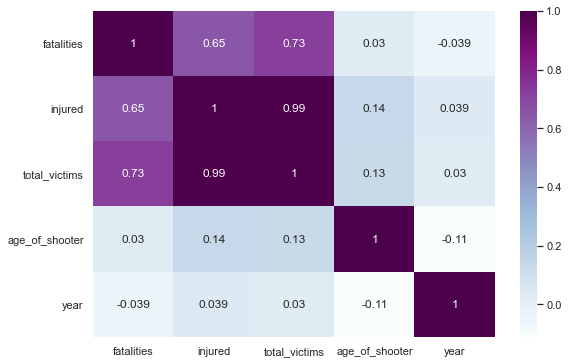

In [62]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='BuPu')

In [63]:
df.to_csv("clean_data.csv")

In [66]:
len(df2_black.groupby("year")["fatalities"])


16

In [67]:
len(df2_white.groupby("year")["fatalities"])


33

## Relationship between location - race - mental health details

### It can be clearly seen almost all cases shooters have prior signs of mental health issues regardless of race or location where case is happened.

#### Most cases are performed by white male shooters who have prior sign of mental health issues

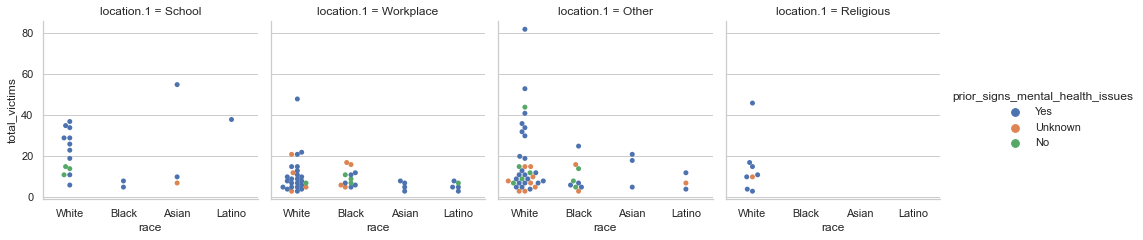

In [159]:
desired_races = ["White", "Black", "Asian", "Latino"]
filtered_df = df[df["race"].isin(desired_races)]

desired_locations = ["School","Workplace","Other","Religious"]
filtered_df = filtered_df[filtered_df["location.1"].isin(desired_locations)]
sns.catplot(data=filtered_df,kind="swarm",x="race",y="total_victims",hue="prior_signs_mental_health_issues",col="location.1",height=3.3)

#### by gender :

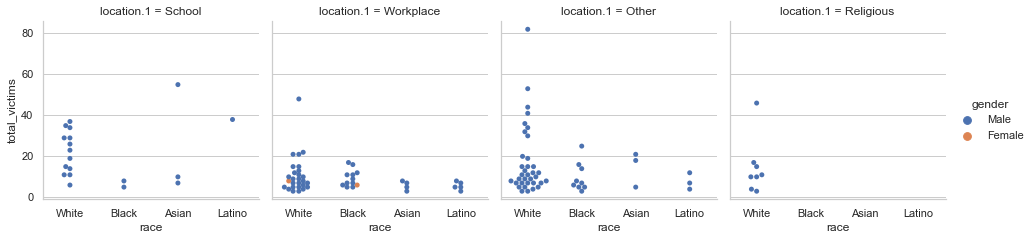

In [161]:
desired_races = ["White", "Black", "Asian", "Latino"]
filtered_df = df[df["race"].isin(desired_races)]

desired_locations = ["School","Workplace","Other","Religious"]
filtered_df = filtered_df[filtered_df["location.1"].isin(desired_locations)]

sns.catplot(data=filtered_df,kind="swarm",x="race",y="total_victims",hue="gender",col="location.1",height=3.3)

If mostly all locations have shooters who have prior mental health issues what are these mental health problems? 
Can we find a distinction between location and shooter's mental health details?

### In school location cases depression holds highest number of total victims

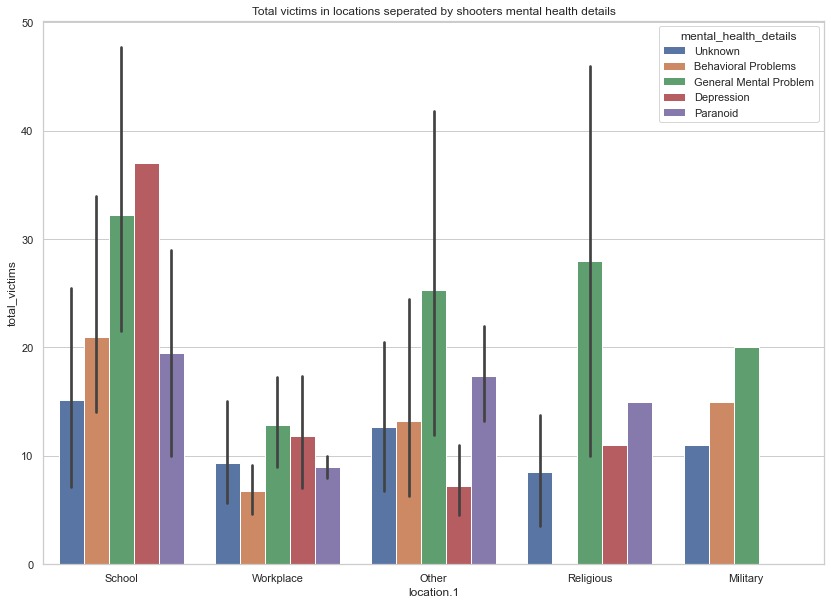

In [60]:
desired_details=["General Mental Problem","Behavioral Problems","Depression","Paranoid","Unknown"]
filtered=df[df["mental_health_details"].isin(desired_details)]
desired_races = ["White", "Black", "Asian", "Latino"]
filtered=filtered[filtered["race"].isin(desired_races)]
plt.figure(figsize=(14,10))

sns.barplot(data=filtered,x="location.1",y="total_victims",hue="mental_health_details").set(title="Total victims in locations seperated by shooters mental health details")
plt.show()

As it can be seen general mental problems are mostly distributed in all locations. After that behavioral problems,depression and paranoid hold important part

One important thing is in school location cases depression has the most number of total victims

### Most common cases are commited with legal weapon, and year by year these cases are increasing

In [83]:
df3=df.set_index("year")

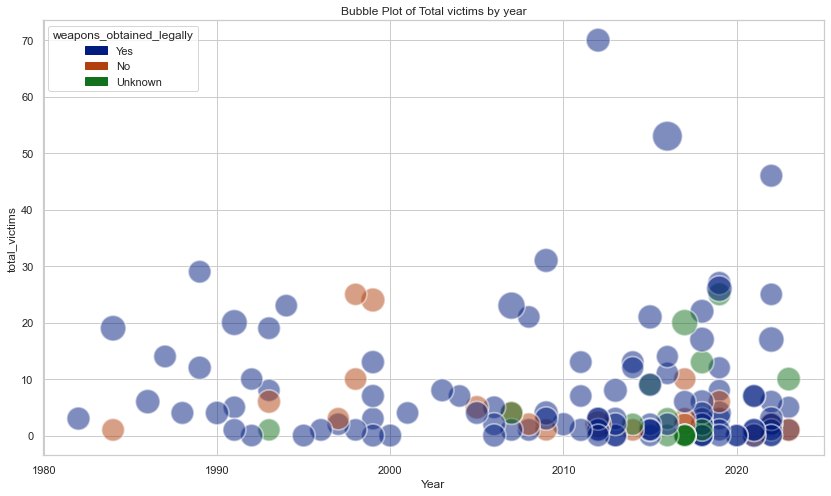

In [160]:

from matplotlib import patches as mpatches

sns.set(style="whitegrid")

categories = df3["weapons_obtained_legally"].unique()

colors = sns.color_palette("dark", n_colors=len(categories))
plt.figure(figsize=(14,8))

scatterplot = sns.scatterplot(
    data=df3,
    x=df3.index,
    y="injured",
    hue="weapons_obtained_legally",
    size="fatalities",
    palette=colors,
    alpha=0.5,  
    sizes=(500, 900)  
)

plt.title("Bubble Plot of Total victims by year")
plt.xlabel("Year")
plt.ylabel("total_victims")
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, categories)]
plt.legend(handles=legend_patches, title="weapons_obtained_legally", loc="upper left") 
plt.show()


### Relationship between state, race, total victims

#### Top 5 common district :

Text(0.5, 1.0, 'Top 5 common district')

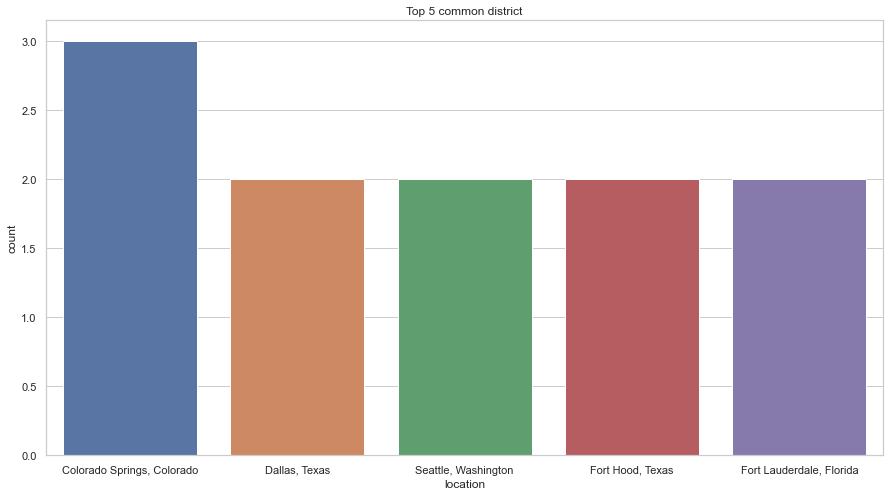

In [130]:
top_locations=df["location"].value_counts().head(5)
plt.figure(figsize=(15,8))
sns.countplot(x=df["location"],order=top_locations.index)
plt.title("Top 5 common district")


In [76]:
top_locations.index

Index(['Colorado Springs, Colorado', 'Dallas, Texas', 'Seattle, Washington',
       'Fort Hood, Texas', 'Fort Lauderdale, Florida'],
      dtype='object')

In [120]:
df["state"] = df["location"].str.split(",").str[-1].str.strip()

Text(0.5, 1.0, 'Top 5 common states')

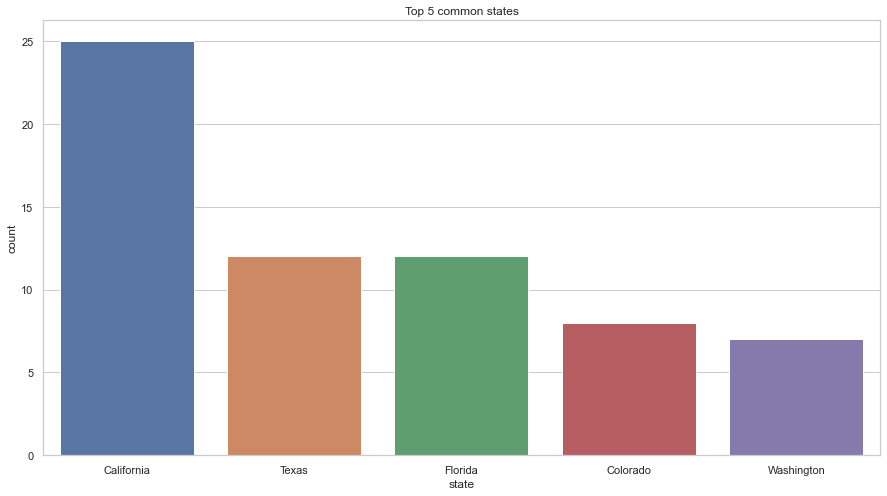

In [132]:
top_locations_state=df["state"].value_counts().head(5)
plt.figure(figsize=(15,8))
sns.countplot(x=df["state"],order=top_locations_state.index)
plt.title("Top 5 common states")

Text(0.5, 1.0, 'Top 5 common states and total victims distributed by race')

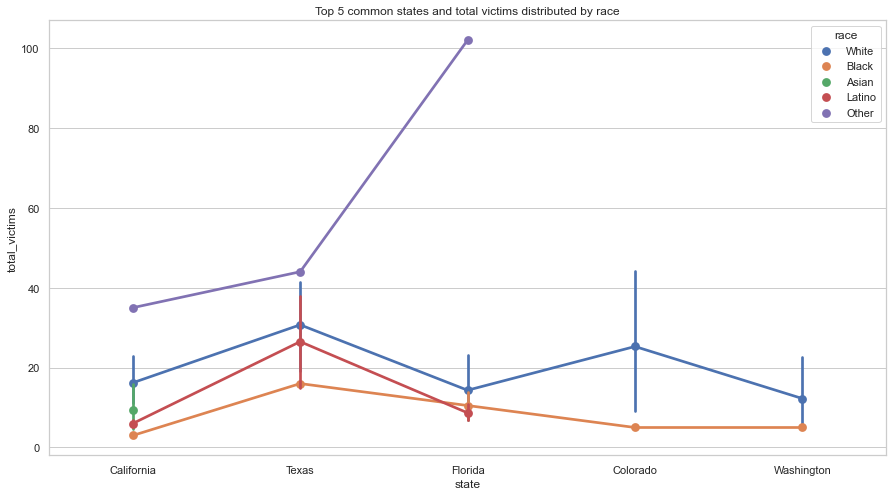

In [138]:
desired_race=["White","Asian","Black","Latino","Other"]
filtered=df[df["race"].isin(desired_race)]
plt.figure(figsize=(15,8))
sns.pointplot(data=filtered,x="state",y="total_victims",order=top_locations_state.index,hue="race")
plt.title("Top 5 common states and total victims distributed by race")

As it can be seen first graph shows common districts and we see cases are distributed different districts. The most common district where cases are committed is Colorado Springs, Colorado with 3 cases. The Second graph shows most common states which is more meaningful. The most common state is California. Although California is the most common state, we don’t see its districts in the 5 most common districts. In the last chart we see race distribution in these common states ranked by total victims



It is obvious that shooters who is white race has the most number of total victims in top 5 common states (except other). In some states like Texas and California Latino activities are higher than black activities. Among 5 states Florida is the state with the most racially similar total number of victims.

# Conclusion

Generally, shooters' ages change between 20-40, they are white and they have mental problems. Most of the cases are committed in workplaces, schools, and other places. Shooters' age in school has the lowest median and variability while workplaces have the highest variability. Then I looked at location, mental health, and race in more detail and I saw most of the shooters have mental health problems. Then I looked at the total victims in locations and I saw shooters who have depression have the highest number of total victims. After that I looked at whether weapons were obtained legally or not I found a very high percentage of the cases are committed with a legally obtained weapon and I also found the total number of victims who are committed by legal weapons is also increasing year by year. Finally, I looked at district and state I found districts have high variability then I looked at states and I found California is the first state where cases happened most frequently. Finally, I investigated the total victims’ race relationship in these states and I found mostly white shooters have the highest number of total victims.